<a href="https://colab.research.google.com/github/jpcezario/TCC2021/blob/main/TCC_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC - Análise Exploratória:

Esse relatório é um resumo de todos os dados disponíveis no arquivo de dados.

# Solução:

- Passo 1 - Importar a base de Dados
- Passo 2 - Visualizar a Base de Dados para ver se precisamos fazer algum tratamento
- Passo 3 - Verificando Dados de Entrada
  - Quantidade de Falhas

### Passo 1 - Importando a Base de Dados e Passo 2 - Visualizando os Dados

*   Item da lista
*   Item da lista

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'/content/sample_data/LogTrem_TCC_v1.xlsx', index_col='SISTEMA')

display(df)

,FROTA,TREM,ORIGEM,DATA,HORA,FALHA,ID,CARRO,POSIÇÃO
SISTEMA,,,,,,,,,
459082,I,I13,MPU,2020-12-17 00:00:00,00:36:30,CLM,Unidade 1 Falha,8B,1
671050,I,I13,MPU,2020-12-17 00:00:00,00:36:30,CLM,Unidade 1 Falha,8C,2
740039,I,I13,MPU,2020-12-17 00:00:00,00:36:30,CLM,Unidade 2 Falha,93,3
742039,I,I13,MPU,2020-12-17 00:00:00,00:36:30,ACE,Falha no fornecimento de 48V,5BF,2
437933,I,I13,MPU,2020-12-17 00:00:00,00:36:31,ACE,Falha no fornecimento de 380Vac,5BB,2
...,...,...,...,...,...,...,...,...,...
19075,I,I13,MPU,D - 1/1/202,1 18:02:,FSD,Extintor retirado,10,4
19245,I,I13,MPU,D - 1/1/202,1 18:02:,FSD,Extintor retirado,10,4
19875,I,I13,MPU,D - 1/1/202,1 18:02:,FSD,Extintor retirado,10,4


### Passo 3 - Verificando Dados de Entrada

In [2]:
# ver as primeiras entradas
df.head()

,FROTA,TREM,ORIGEM,DATA,HORA,FALHA,ID,CARRO,POSIÇÃO
SISTEMA,,,,,,,,,
459082,I,I13,MPU,2020-12-17 00:00:00,00:36:30,CLM,Unidade 1 Falha,8B,1
671050,I,I13,MPU,2020-12-17 00:00:00,00:36:30,CLM,Unidade 1 Falha,8C,2
740039,I,I13,MPU,2020-12-17 00:00:00,00:36:30,CLM,Unidade 2 Falha,93,3
742039,I,I13,MPU,2020-12-17 00:00:00,00:36:30,ACE,Falha no fornecimento de 48V,5BF,2
437933,I,I13,MPU,2020-12-17 00:00:00,00:36:31,ACE,Falha no fornecimento de 380Vac,5BB,2


## Resumo do DataFrame

Obtendo um resumo geral sobre todas as variáveis (colunas) do seu conjunto de dados.

Você consegue ver a quantidade de entradas, valores não-nulos e o tipo de cada variável. Também é informado a quantidade de memória que está sendo usado para carregar o *DataFrame* na máquina.

In [3]:
# ver o resumo do df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31286 entries, 459082 to 20615
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FROTA    31286 non-null  object
 1   TREM     31286 non-null  object
 2   ORIGEM   31286 non-null  object
 3   DATA     31286 non-null  object
 4   HORA     31286 non-null  object
 5   FALHA    31286 non-null  object
 6   ID       31286 non-null  object
 7   CARRO    31286 non-null  object
 8   POSIÇÃO  31286 non-null  object
dtypes: object(9)
memory usage: 2.4+ MB


### Identificar o tipo de cada coluna

Identificar os tipos de cada coluna. 

Tipos das variáveis é uma informação importante para você colocar no seu Dicionário de Variáveis de um projeto, pois garante uma boa prática de documentação do projeto.

object = texto

In [4]:
# identificar os tipos de variáveis
df.dtypes

FROTA      object
TREM       object
ORIGEM     object
DATA       object
HORA       object
FALHA      object
ID         object
CARRO      object
POSIÇÃO    object
dtype: object

## Valores únicos

Verificar quais são todos os valores únicos de uma coluna.


In [5]:
df.FALHA.unique()

array([' CLM ', ' ACE ', ' DRV ', ' PAI ', ' PCE ', ' DRS ', ' FSD ',
       ' PRO ', ' BRK ', ' TCN ', ' 1/1/2021 17:05:07.858080 '],
      dtype=object)

In [6]:
df.ID.unique()

array([' Unidade 1 Falha ', ' Unidade 2 Falha ',
       ' Falha no fornecimento de 48V ',
       ' Falha no fornecimento de 380Vac ',
       ' inibido por tensÃ£o de entrada elevada ',
       ' SaÃ\xadda de TensÃ£o CC fora da faixa ',
       ' Sobrecarga de corrente na saÃ\xadda AC ', ' Modo Stand by ',
       ' Estado do VSS em falha menor ',
       ' Sistema de gravaÃ§Ã£o do VSS em falha ',
       ' TraÃ§Ã£o nÃ£o operacional ',
       ' Freio elÃ©trico nÃ£o operacional ',
       ' Falha do freio eletrodinÃ¢mico ', ' Falha alta tensÃ£o no trem ',
       ' Porta isolada pneumaticamente ', ' DetecÃ§Ã£o de deslizamento ',
       ' Ordem de abertura das portas do lado A ', ' Extintor retirado ',
       ' Falha na GP IO ', ' PCE identification ',
       ' DiscordÃ¢ncia no freio de EmergÃªncia ',
       ' Falha menor na rede Ethernet ',
       ' DiscordÃ¢ncia entre relÃ© e saÃ\xadda digital (R.Plat) ',
       ' DiscordÃ¢ncia do estado do relÃª V0 ',
       ' BCE Falha no modo (traÃ§Ã£o e fr

Enquanto o método acima retorna a lista de valores únicos, muitas vezes queremos saber a frequência com que elas ocorrem.

No exemplo da coluna `ID`, para saber a quantidade de cada tipo de ocorrência, podemos usar `value_counts()`.

In [7]:
df.ID.value_counts().head(20)

 Extintor retirado                             9280
 Falha na GP IO                                3410
 Sobrecarga de corrente na saÃ­da AC           2600
 Falha do freio eletrodinÃ¢mico                2025
 PCE identification                            1754
 DiscordÃ¢ncia no freio de EmergÃªncia         1542
 Porta isolada pneumaticamente                  789
 Unidade 1 Falha                                662
 Unidade 2 Falha                                630
 Freio elÃ©trico nÃ£o operacional               542
 Falha no comando da valvula eletromag          540
 TraÃ§Ã£o nÃ£o operacional                      540
 Falha no fornecimento de 48V                   506
 Falha maior no DLM                             504
 Perda de comunicaÃ§Ã£o com o DLM               502
 Falha no fornecimento de 380Vac                496
 DiscordÃ¢ncia do estado do relÃª V0            456
 Estado do VSS em falha menor                   418
 InconsistÃªncia entre trainlines de freio      351
 Falha no PL

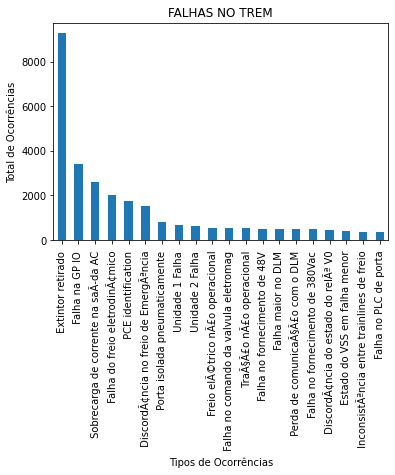

In [8]:
df.ID.value_counts().head(20).plot(kind='bar', title="FALHAS NO TREM", xlabel="Tipos de Ocorrências", ylabel="Total de Ocorrências")

Para transformar a célula acima em porcentagem, é só dividir os valores pela quantidade total de linhas do nosso conjunto de dados.

Como vimos lá atrás, a quantidade de linhas é obtida por `df.shape[0]`.

Extintor retirado = 29.66%

In [9]:
df.ID.value_counts() / df.shape[0]

 Extintor retirado                          0.296618
 Falha na GP IO                             0.108994
 Sobrecarga de corrente na saÃ­da AC        0.083104
 Falha do freio eletrodinÃ¢mico             0.064725
 PCE identification                         0.056063
                                              ...   
 Sem comunicaÃ§Ã£o com o TCMS               0.000064
 CLM                                        0.000032
 Loss of train network communications 1     0.000032
 Deslizamento detectado no truque 1         0.000032
 Estado do VSS em falha maior               0.000032
Name: ID, Length: 110, dtype: float64

## Filtrando valores

Existem alguns métodos principais para resgatar e filtrar valores em um *DataFrame*, cada um com suas características distintas.

### loc

Suponha que eu precise extrair a FALHA, ID, CARRO e POSIÇÃO do SISTEMA cuja ocorrência é número `742039`:

In [10]:
df.loc[742039,['FALHA','ID','CARRO','POSIÇÃO']]


FALHA                                ACE 
ID          Falha no fornecimento de 48V 
CARRO                                5BF 
POSIÇÃO                                 2
Name: 742039, dtype: object

Vou dar um exemplo da segunda situação em que podemos usar loc. Suponha que eu queria saber todos os ID onde eu tive ocorrência do tipo "Porta isolada pneumaticamente":

In [11]:
df[df['ID'] == ' Porta isolada pneumaticamente '].head()

,FROTA,TREM,ORIGEM,DATA,HORA,FALHA,ID,CARRO,POSIÇÃO
SISTEMA,,,,,,,,,
878963,I,I13,MPU,2020-12-17 00:00:00,00:12:00,DRS,Porta isolada pneumaticamente,5AF,6
18941,I,I13,MPU,2020-12-17 00:00:00,00:12:01,DRS,Porta isolada pneumaticamente,5B0,6
801362,I,I13,MPU,2020-12-17 00:00:00,00:12:04,DRS,Porta isolada pneumaticamente,5B0,6
360277,I,I13,MPU,2020-12-17 00:00:00,00:12:05,DRS,Porta isolada pneumaticamente,5AF,6
517797,I,I13,MPU,2020-12-17 00:00:00,14:05:53,DRS,Porta isolada pneumaticamente,5AF,6


ID com ocorrência 'Extintor retirado'

In [12]:
df[df['CARRO'] == 10].head()

,FROTA,TREM,ORIGEM,DATA,HORA,FALHA,ID,CARRO,POSIÇÃO
SISTEMA,,,,,,,,,
246045,I,I13,MPU,2020-12-17 00:00:00,00:10:09,FSD,Extintor retirado,10,4
309035,I,I13,MPU,2020-12-17 00:00:00,00:10:09,FSD,Extintor retirado,10,4
346030,I,I13,MPU,2020-12-17 00:00:00,00:10:09,FSD,Extintor retirado,10,4
380024,I,I13,MPU,2020-12-17 00:00:00,00:10:09,FSD,Extintor retirado,10,4
442015,I,I13,MPU,2020-12-17 00:00:00,00:10:09,FSD,Extintor retirado,10,4


ID com ocorrência 'Sobrecarga de corrente na saí­da AC'

In [13]:
df[df['ID'] == ' Sobrecarga de corrente na saÃ­da AC '].head()

,FROTA,TREM,ORIGEM,DATA,HORA,FALHA,ID,CARRO,POSIÇÃO
SISTEMA,,,,,,,,,
789952,I,I13,MPU,2020-12-17 00:00:00,01:40:20,ACE,Sobrecarga de corrente na saÃ­da AC,5F7,3
997920,I,I13,MPU,2020-12-17 00:00:00,01:40:20,ACE,Sobrecarga de corrente na saÃ­da AC,5F7,3
750603,I,I13,MPU,2020-12-17 00:00:00,01:50:17,ACE,Sobrecarga de corrente na saÃ­da AC,5F7,3
958571,I,I13,MPU,2020-12-17 00:00:00,01:50:17,ACE,Sobrecarga de corrente na saÃ­da AC,5F7,3
690389,I,I13,MPU,2020-12-17 00:00:00,01:59:47,ACE,Sobrecarga de corrente na saÃ­da AC,5F7,3


### iloc

Selecionar um *range* de interesse. Por exemplo, para selecionar as 6 primeiras entradas e as colunas da 5 a 9, eu faria da seguinte maneira:

In [14]:
df.iloc[:6,4:9]

,HORA,FALHA,ID,CARRO,POSIÇÃO
SISTEMA,,,,,
459082,00:36:30,CLM,Unidade 1 Falha,8B,1
671050,00:36:30,CLM,Unidade 1 Falha,8C,2
740039,00:36:30,CLM,Unidade 2 Falha,93,3
742039,00:36:30,ACE,Falha no fornecimento de 48V,5BF,2
437933,00:36:31,ACE,Falha no fornecimento de 380Vac,5BB,2
209814,00:36:32,ACE,Falha no fornecimento de 380Vac,5BB,2


In [15]:
df.apply(pd.value_counts).fillna(0)

,FROTA,TREM,ORIGEM,DATA,HORA,FALHA,ID,CARRO,POSIÇÃO
I,31286.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I -,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I13,0.0,31285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MPU,0.0,0.0,31285.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
95B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
95F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
95E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [16]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     \ 38.3MB 675kB/s
     |████████████████████████████████| 10.1MB 28.4MB/s 
     |████████████████████████████████| 645kB 33.5MB/s 
     |████████████████████████████████| 112kB 47.2MB/s 
     |████████████████████████████████| 1.1MB 31.3MB/s 
     |████████████████████████████████| 3.1MB 26.6MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 296kB 42.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


In [17]:
# importar as bibliotecas necessárias
import pandas as pd
from pandas_profiling import ProfileReport

# importar dataset
df = pd.read_excel('/content/sample_data/LogTrem_TCC_v1.xlsx', index_col='ID')

In [18]:
df.head()

,FROTA,TREM,ORIGEM,DATA,HORA,SISTEMA,FALHA,CARRO,POSIÇÃO
ID,,,,,,,,,
Unidade 1 Falha,I,I13,MPU,2020-12-17 00:00:00,00:36:30,459082,CLM,8B,1
Unidade 1 Falha,I,I13,MPU,2020-12-17 00:00:00,00:36:30,671050,CLM,8C,2
Unidade 2 Falha,I,I13,MPU,2020-12-17 00:00:00,00:36:30,740039,CLM,93,3
Falha no fornecimento de 48V,I,I13,MPU,2020-12-17 00:00:00,00:36:30,742039,ACE,5BF,2
Falha no fornecimento de 380Vac,I,I13,MPU,2020-12-17 00:00:00,00:36:31,437933,ACE,5BB,2


In [19]:
# criar ProfileReport
report = ProfileReport(df)

In [20]:
# criar visualização iframe
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]